In [1]:
import pandas as pd
import numpy as np

from bokeh.embed import file_html
from bokeh.models import ColumnDataSource, Patches, HoverTool, TapTool, Plot, Range1d
from bokeh.palettes import Blues9
from bokeh.resources import Resources

from jinja2 import Template
from IPython.display import display_html

from constants import PLOT_FORMATS

### Read in map data and numerical data

In [2]:
map_data = pd.read_hdf('data/province_map_data.hdf', 'df')
data = pd.read_csv('data/sample_data_by_year.csv')

In [3]:
print(len(map_data))
map_data.sort('alpha', inplace=True)
map_data.head()

31


,code,name_zh,name_en,alpha,xs,ys
0,340000,安徽省,Anhui,AH,"(116.8389978365808, 116.84773115386969, 116.90...","(34.38921906191021, 34.389761664269344, 34.400..."
1,110000,北京市,Beijing,BJ,"(117.07273034133209, 117.0876131526249, 117.09...","(40.673538316340256, 40.675011094686226, 40.67..."
2,500000,重庆市,Chongqing,CQ,"(109.3359932795662, 109.57308475126024, 109.59...","(31.705248521402126, 31.730104885232265, 31.73..."
3,350000,福建省,Fujian,FJ,"[117.43482506600012, 117.44778172300019, 117.4...","[23.750718492000075, 23.742251607000114, 23.75..."
5,440000,广东省,Guangdong,GD,"[110.44263756600006, 110.44752037900005, 110.4...","[20.663519598, 20.658351955000015, 20.65477122..."


In [4]:
print(len(data))
data.head(5)

31


,alpha,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AH,94.083611,76.483387,71.823215,75.412870,91.453280,95.590606,11.846818,44.763042,48.322910,...,94.082644,43.689790,77.972573,55.905082,44.992917,7.371498,20.423048,20.444408,99.145668,49.213943
1,BJ,60.270488,28.241463,1.140847,1.618958,85.481787,62.384181,26.927837,9.128019,35.509016,...,13.017705,29.907960,16.147631,20.208672,56.874279,30.607573,91.108349,98.669229,86.328637,98.744663
2,CQ,17.200208,53.353281,91.288610,18.212228,15.301515,98.863347,93.625437,81.373766,91.175133,...,82.331162,62.972087,59.823038,9.210000,85.183689,26.391399,83.519515,62.339977,69.550607,64.811959
3,FJ,62.326373,83.162692,94.978664,86.498962,29.611025,0.815955,37.018112,53.646194,51.946035,...,44.785025,91.879779,56.123416,33.874667,71.033189,47.254557,37.132842,70.337150,69.162542,90.230767
4,GD,29.758603,10.449457,20.505146,24.007428,96.647628,16.856430,94.343132,79.575819,42.703527,...,0.594887,83.053451,99.121552,59.704996,27.299473,31.753987,85.667075,98.753561,40.162510,60.651400


### Join to gether the map data and numerical data

Note if you have a column name matching one in the map_data file (alpha, code, name_en, name_zh), this will work automagically. If not, you can specify columns for the merge.

In [5]:
all_data = map_data.merge(data)
all_data.head()

,code,name_zh,name_en,alpha,xs,ys,1990,1991,1992,1993,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,340000,安徽省,Anhui,AH,"(116.8389978365808, 116.84773115386969, 116.90...","(34.38921906191021, 34.389761664269344, 34.400...",94.083611,76.483387,71.823215,75.412870,...,94.082644,43.689790,77.972573,55.905082,44.992917,7.371498,20.423048,20.444408,99.145668,49.213943
1,110000,北京市,Beijing,BJ,"(117.07273034133209, 117.0876131526249, 117.09...","(40.673538316340256, 40.675011094686226, 40.67...",60.270488,28.241463,1.140847,1.618958,...,13.017705,29.907960,16.147631,20.208672,56.874279,30.607573,91.108349,98.669229,86.328637,98.744663
2,500000,重庆市,Chongqing,CQ,"(109.3359932795662, 109.57308475126024, 109.59...","(31.705248521402126, 31.730104885232265, 31.73...",17.200208,53.353281,91.288610,18.212228,...,82.331162,62.972087,59.823038,9.210000,85.183689,26.391399,83.519515,62.339977,69.550607,64.811959
3,350000,福建省,Fujian,FJ,"[117.43482506600012, 117.44778172300019, 117.4...","[23.750718492000075, 23.742251607000114, 23.75...",62.326373,83.162692,94.978664,86.498962,...,44.785025,91.879779,56.123416,33.874667,71.033189,47.254557,37.132842,70.337150,69.162542,90.230767
4,440000,广东省,Guangdong,GD,"[110.44263756600006, 110.44752037900005, 110.4...","[20.663519598, 20.658351955000015, 20.65477122...",29.758603,10.449457,20.505146,24.007428,...,0.594887,83.053451,99.121552,59.704996,27.299473,31.753987,85.667075,98.753561,40.162510,60.651400


#### CHECK THAT YOU HAVE THE EXPECTED NUMBER OF ROWS

In [6]:
len(all_data) == len(map_data)

True

# Color your data

In [7]:
def color_data(data, columns_to_colorify, data_min=None, data_max=None, palette=Blues9):
    # data - the data frame which you are adding colored values to
    # columns_to_colorify - a list of strings which select the columns
    
    if data_min is None:
        num_only = data[columns_to_colorify]
        global_min = num_only.min().min()
        data_min = np.floor(global_min)

    if data_max is None:
        num_only = data[columns_to_colorify]
        global_max = num_only.max().max()
        data_max = np.ceil(global_max)
    
    data_range = data_max - data_min
    bin_factor = data_range / len(palette)
    
    def _get_color(value, palette):
        index = int(value / bin_factor)
        return palette[index - 1]

    for column_name in columns_to_colorify:
        color_name = '%s_color' % column_name
        data[color_name] = data['%s' % column_name].apply(_get_color, args=([palette]))
    return data

colored_data = color_data(all_data, [str(x) for x in range(1990, 2015)])
colored_data[['1990_color']].head()

,1990_color
0,#deebf7
1,#6baed6
2,#08306b
3,#6baed6
4,#08519c


# Make a static map for 1990 data

In [8]:
from constants import PLOT_FORMATS

def setup_china_map_plot(column_to_plot, plot_width=600, x_range=[70, 140], y_range=[10, 60], title=""):
    aspect_ratio = (x_range[1] - x_range[0]) / (y_range[1] - y_range[0])
    plot_height = int(plot_width / aspect_ratio)
    x_range = Range1d(x_range[0], x_range[1])
    y_range = Range1d(y_range[0], y_range[1])
    plot = Plot(
        x_range=x_range, 
        y_range=y_range, 
        title=title, 
        plot_width=plot_width, 
        plot_height=plot_height, 
        **PLOT_FORMATS)
    
    countries = Patches(
        xs='xs', 
        ys='ys',
        fill_color=column_to_plot,
        line_color=Blues9[0]
    )    
    
    plot.add_glyph(ColumnDataSource(colored_data), countries)
    return plot

<!DOCTYPE html>
 
 
 
 1990 - Random data 
 
 
 
 1990 - Random data 
 
 Some explanatory text.
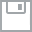
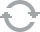
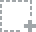
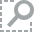
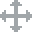
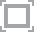
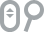

In [9]:
PLOT_WIDTH = 900
TITLE = '1990 - Random data'
COLUMN_TO_PLOT = '1990_color'

map_box = setup_china_map_plot(COLUMN_TO_PLOT, plot_width=PLOT_WIDTH)

tooltips = "<span class='tooltip-text year'>1990</span>"                   
tooltips += "<span class='tooltip-text country'>@name_en</span>"               
tooltips += "<span class='tooltip-text value'>@1990</span>"                                    
map_box.add_tools(HoverTool(tooltips=tooltips, point_policy='none'))


# Open our custom template
with open('interactive_map_template.jinja', 'r') as f:
    template = Template(f.read())

resources = Resources(mode='inline')
# Update these to change the text
template_variables = {
    'title': TITLE,
    'narrative': 'Some explanatory text.',
    'bokeh_min_js': resources.js_raw[0],
}

# Use inline resources, render the html and open
html = file_html(map_box, resources, TITLE, template=template, template_variables=template_variables)
display_html(html, raw=True)